In [1]:
# Hacer de nuevo tablas de estadisticos con las horas de picos de BM y LLJ
# Buscar definicion de CRMSD, agregar a descripcion de estadisticos
# hacer graficas de Taylor de niveles bajos y altos


In [2]:
import matplotlib.pyplot as plt 
#plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 200
import numpy.ma as ma
import xarray as xr
import pandas as pd
import numpy as np
# ds083 GFS NAM
# p1s1 p2s2 p7s7

In [3]:
expruns = ['20120816_d03_gfs05_p1r1', '20120816_d03_gfs05_p1r3','20120816_d03_gfs05_p1r5',
           '20120816_d03_gfs05_p2r1', '20120816_d03_gfs05_p2r3','20120816_d03_gfs05_p2r5'
          '20120816_d03_gfs05_p1r1', '20120816_d03_gfs05_p1r3','20120816_d03_gfs05_p1r5',
           '20120816_d03_gfs05_p2r1', '20120816_d03_gfs05_p2r3','20120816_d03_']
expnames = ['g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5','n1r1', 'n1r3', 'n1r5', 'n2r1', 'n2r3', 'n2r5']
ids = [0,1,2,7,12,17,22,27,32,37,42,47]
levlabel = ['30m', '40m', '50m', '100m', '150m', '200m', '250m', '300m', '350m', '400m', '450m', '500m']
levs=[30,40,50,100,150,200,250,300,350,400,450,500]
levn=['30','40','50','100','150','200','250','300','350','400','450','500']
t1, t2, t3, t4 = '2012-08-16 12:00', '2012-08-17 12:00', '2012-08-18 12:00', '2012-08-19 12:00'

expruns[1]

'20120816_d03_gfs05_p1r3'

In [4]:
# READ WRF INTERP DATA

g1r1 = xr.open_dataset('interp30/sodar_g1r1.nc')['uv30'].to_pandas()
g1r3 = xr.open_dataset('interp30/sodar_g1r3.nc')['uv30'].to_pandas()
g1r5 = xr.open_dataset('interp30/sodar_g1r5.nc')['uv30'].to_pandas()
g2r1 = xr.open_dataset('interp30/sodar_g2r1.nc')['uv30'].to_pandas()
g2r3 = xr.open_dataset('interp30/sodar_g2r3.nc')['uv30'].to_pandas()
g2r5 = xr.open_dataset('interp30/sodar_g2r5.nc')['uv30'].to_pandas()
n1r1 = xr.open_dataset('interp30/sodar_n1r1.nc')['uv30'].to_pandas()
n1r3 = xr.open_dataset('interp30/sodar_n1r3.nc')['uv30'].to_pandas()
n1r5 = xr.open_dataset('interp30/sodar_n1r5.nc')['uv30'].to_pandas()
n2r1 = xr.open_dataset('interp30/sodar_n2r1.nc')['uv30'].to_pandas()
n2r3 = xr.open_dataset('interp30/sodar_n2r3.nc')['uv30'].to_pandas()
n2r5 = xr.open_dataset('interp30/sodar_n2r5.nc')['uv30'].to_pandas()

drw1 = xr.open_dataset('interp30/sodar_g1r1.nc')['wd30'].to_pandas()
drw2 = xr.open_dataset('interp30/sodar_g1r3.nc')['wd30'].to_pandas()
drw3 = xr.open_dataset('interp30/sodar_g1r5.nc')['wd30'].to_pandas()
drw4 = xr.open_dataset('interp30/sodar_g2r1.nc')['wd30'].to_pandas()
drw5 = xr.open_dataset('interp30/sodar_g2r3.nc')['wd30'].to_pandas()
drw6 = xr.open_dataset('interp30/sodar_g1r5.nc')['wd30'].to_pandas()

tvg1r1 = xr.open_dataset('interp30/sodar_g1r1.nc')['tv30'].to_pandas()
tvg1r3 = xr.open_dataset('interp30/sodar_g1r3.nc')['tv30'].to_pandas()
tvg1r5 = xr.open_dataset('interp30/sodar_g1r5.nc')['tv30'].to_pandas()
tvg2r1 = xr.open_dataset('interp30/sodar_g2r1.nc')['tv30'].to_pandas()
tvg2r3 = xr.open_dataset('interp30/sodar_g2r3.nc')['tv30'].to_pandas()
tvg2r5 = xr.open_dataset('interp30/sodar_g2r5.nc')['tv30'].to_pandas()
tvn1r1 = xr.open_dataset('interp30/sodar_n1r1.nc')['tv30'].to_pandas()
tvn1r3 = xr.open_dataset('interp30/sodar_n1r3.nc')['tv30'].to_pandas()
tvn1r5 = xr.open_dataset('interp30/sodar_n1r5.nc')['tv30'].to_pandas()
tvn2r1 = xr.open_dataset('interp30/sodar_n2r1.nc')['tv30'].to_pandas()
tvn2r3 = xr.open_dataset('interp30/sodar_n2r3.nc')['tv30'].to_pandas()
tvn2r5 = xr.open_dataset('interp30/sodar_n2r5.nc')['tv30'].to_pandas()

sread_w =  pd.read_pickle('sodar_sp.pk')
sread_d =  pd.read_pickle('sodar_dd.pk')
sread_t =  pd.read_pickle('sodar_tv.pk')

sodarw =  sread_w.iloc[:,ids][t1:t4]
sodard =  sread_d.iloc[:,ids][t1:t4]
sodart =  sread_t.iloc[:,ids][t1:t4]


In [5]:
inds = np.append(np.arange(0,25),np.arange(48,73))
indl = np.append(np.arange(24,49),np.arange(72,97))

sea = sodarw.iloc[inds]
llj = sodarw.iloc[indl]

print(sea.shape, llj.shape, indl.shape, inds.shape)


(50, 12) (50, 12) (50,) (50,)


In [6]:
lev = 2

wg1 = pd.DataFrame(g1r1.iloc[:,lev])
wg2 = pd.DataFrame(g1r3.iloc[:,lev])
wg3 = pd.DataFrame(g1r5.iloc[:,lev])
wg4 = pd.DataFrame(g2r1.iloc[:,lev])
wg5 = pd.DataFrame(g2r3.iloc[:,lev])
wg6 = pd.DataFrame(g2r5.iloc[:,lev])
wn1 = pd.DataFrame(n1r1.iloc[:,lev])
wn2 = pd.DataFrame(n1r3.iloc[:,lev])
wn3 = pd.DataFrame(n1r5.iloc[:,lev])
wn4 = pd.DataFrame(n2r1.iloc[:,lev])
wn5 = pd.DataFrame(n2r3.iloc[:,lev])
wn6 = pd.DataFrame(n2r5.iloc[:,lev])



In [7]:
j=0
lev = j
print(lev)
    #          time,lev
r = [llj.iloc[:,lev] for i in range(12)] 
validt = [list(np.where(~r[i].isnull())[0]) for i in range(12)]
r = [llj.iloc[validt[i],lev] for i in range(12)] 

#          g1r1.iloc[indl,lev][validt]
p = [eval(expnames[i]+'.iloc[indl,lev][validt['+str(i)+']]') for i in range(12)] 

0


In [8]:
r = [llj.iloc[:,lev] for i in range(12)] 
validt = [list(np.where(~r[i].isnull())[0]) for i in range(12)]
ndim = len(validt[0])
print('valid data '+str(ndim))    
r = [llj.iloc[validt[i],lev] for i in range(12)] 
#          g1r1.iloc[indl,lev][validt]
p = [eval(expnames[i]+'.iloc[inds,lev][validt['+str(i)+']]') for i in range(12)] 

valid data 48


In [9]:
from IPython.display import display
for j in range(12):
    lev = j
    print(lev)
    ######    LLJ    #####
    #          time,lev
    r = [llj.iloc[:,lev] for i in range(12)] 
    validt = [list(np.where(~r[i].isnull())[0]) for i in range(12)]
    ndim = len(validt[0])
    print('valid data '+str(ndim))    
    rv = [llj.iloc[validt[i],lev] for i in range(12)] 
    #          g1r1.iloc[indl,lev][validt]
    pv = [eval(expnames[i]+'.iloc[inds,lev][validt['+str(i)+']]') for i in range(12)] 
    
    pvm = [np.mean(pv[i]) for i in range(12)] 
    rvm = [np.mean(rv[i]) for i in range(12)]
    p_pm = [(pv[i] - pvm[i]) for i in range(12)]
    r_rm = [(rv[i] - rvm[i]) for i in range(12)]
    crmsd = [np.sqrt(np.average(np.square((p_pm[i]) - (r_rm[i])))) for i in range(12)]
    sdevp = [np.std(pv[i]) for i in range(12)]
    sdevr = [np.std(rv[i]) for i in range(12)]
    #  ratio:  Case_Variance/Reference_Variance   ratio  = sqrt(tvar/rvar)
    ratio = [np.sqrt(np.var(pv[i]) / np.var(rv[i])) for i in range(12)]
    bias = [(np.average(pv[i]) - np.average(rv[i])) for i in range(12)]
    sdev = [[sdevr[i], sdevp[i]] for i in range(12)];
    ccoef =[ np.corrcoef(rv[i], pv[i])[1,0] for i in range(12)]
    sdev = np.array(np.append(sdevr[0], sdevp))
    crmsd = np.array(np.append(0, crmsd))
    ccoef = np.array(np.append(1, ccoef))
    bias = np.append(0,bias)
    ratio = np.append(1,ratio)
    #print(expnames[0], sdev[0], crmsd[0], ccoef[0])
    #print(np.size(r[0]), np.size(p[0]))

    ######    LOW LEVEL JET    #####
    xnames=['LLJ_'+levlabel[lev]]+expnames
    media = np.array(np.append(rvm[0], pvm))
    import pandas as pd
    pd.options.display.float_format = '{:.3f},'.format
    print ('LLJ '+levlabel[lev])
    pd.DataFrame([media,bias,sdev,ratio,ccoef], columns=xnames, index=['media','bias','sdev','ratio','ccoef'])
    display(pd.DataFrame([media,ratio,ccoef,sdev,bias], columns=xnames, index=['media','ratio','ccoef','sdev','bias']))
    data=pd.DataFrame([media,ratio,ccoef,sdev,bias], columns=xnames, index=['media','ratio','ccoef','sdev','bias'])
    data.to_pickle(path=str(j)+'_file.pkl')
rlljm = [[3.03], [2.52], [2.95], [3.86], [4.49], [4.88], [5.39], [5.41], [6.46], [6.93], [7.36], [7.21]]

0
valid data 48
LLJ 30m


,LLJ_30m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"3.036,","4.111,","4.142,","4.019,","4.240,","4.349,","4.197,","4.594,","4.661,","4.541,","4.610,","4.725,","4.723,"
ratio,"1.000,","1.350,","1.382,","1.316,","1.659,","1.620,","1.619,","1.578,","1.608,","1.550,","1.807,","1.775,","1.766,"
ccoef,"1.000,","-0.017,","-0.050,","0.034,","-0.002,","-0.029,","0.017,","-0.012,","0.059,","0.079,","0.090,","0.092,","0.038,"
sdev,"1.499,","2.024,","2.072,","1.973,","2.486,","2.428,","2.426,","2.365,","2.410,","2.323,","2.708,","2.660,","2.647,"
bias,"0.000,","1.074,","1.106,","0.982,","1.204,","1.313,","1.161,","1.557,","1.625,","1.505,","1.574,","1.689,","1.687,"


1
valid data 50
LLJ 40m


,LLJ_40m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"2.522,","4.223,","4.274,","4.125,","4.347,","4.485,","4.310,","4.680,","4.749,","4.629,","4.731,","4.842,","4.828,"
ratio,"1.000,","1.085,","1.105,","1.061,","1.331,","1.289,","1.294,","1.286,","1.306,","1.259,","1.433,","1.410,","1.406,"
ccoef,"1.000,","-0.030,","-0.053,","0.018,","-0.040,","-0.059,","-0.016,","-0.029,","0.048,","0.042,","0.062,","0.073,","-0.017,"
sdev,"1.917,","2.079,","2.118,","2.034,","2.551,","2.470,","2.480,","2.464,","2.503,","2.412,","2.746,","2.702,","2.694,"
bias,"0.000,","1.700,","1.752,","1.603,","1.825,","1.962,","1.788,","2.158,","2.227,","2.107,","2.209,","2.319,","2.305,"


2
valid data 50
LLJ 50m


,LLJ_50m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"2.953,","4.351,","4.408,","4.246,","4.476,","4.625,","4.444,","4.827,","4.893,","4.764,","4.875,","4.993,","4.982,"
ratio,"1.000,","1.026,","1.047,","1.003,","1.256,","1.215,","1.215,","1.216,","1.235,","1.191,","1.341,","1.315,","1.304,"
ccoef,"1.000,","-0.073,","-0.084,","-0.030,","-0.090,","-0.108,","-0.069,","-0.116,","-0.007,","-0.027,","0.024,","0.020,","-0.054,"
sdev,"2.084,","2.137,","2.182,","2.089,","2.618,","2.532,","2.532,","2.534,","2.574,","2.482,","2.794,","2.741,","2.717,"
bias,"0.000,","1.399,","1.455,","1.293,","1.523,","1.672,","1.491,","1.874,","1.940,","1.811,","1.922,","2.041,","2.029,"


3
valid data 50
LLJ 100m


,LLJ_100m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"3.864,","4.752,","4.810,","4.647,","5.002,","5.163,","4.953,","5.307,","5.355,","5.174,","5.430,","5.556,","5.591,"
ratio,"1.000,","0.822,","0.830,","0.797,","0.983,","0.956,","0.950,","0.973,","0.985,","0.954,","1.032,","1.007,","0.967,"
ccoef,"1.000,","-0.022,","-0.036,","0.020,","-0.030,","-0.040,","-0.014,","-0.082,","0.032,","-0.003,","0.112,","0.110,","0.008,"
sdev,"2.854,","2.345,","2.368,","2.275,","2.806,","2.730,","2.711,","2.778,","2.812,","2.722,","2.947,","2.874,","2.759,"
bias,"0.000,","0.888,","0.946,","0.783,","1.138,","1.300,","1.089,","1.444,","1.491,","1.311,","1.566,","1.693,","1.728,"


4
valid data 50
LLJ 150m


,LLJ_150m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"4.498,","4.759,","4.818,","4.701,","5.263,","5.379,","5.165,","5.406,","5.420,","5.196,","5.669,","5.785,","5.842,"
ratio,"1.000,","0.779,","0.763,","0.749,","0.897,","0.878,","0.887,","0.920,","0.917,","0.899,","0.961,","0.931,","0.887,"
ccoef,"1.000,","0.038,","0.004,","0.070,","0.017,","0.003,","0.035,","-0.038,","0.050,","0.037,","0.183,","0.172,","0.090,"
sdev,"3.108,","2.420,","2.372,","2.328,","2.788,","2.728,","2.757,","2.859,","2.851,","2.795,","2.986,","2.892,","2.757,"
bias,"0.000,","0.261,","0.320,","0.202,","0.764,","0.880,","0.667,","0.908,","0.921,","0.697,","1.171,","1.287,","1.344,"


5
valid data 50
LLJ 200m


,LLJ_200m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"4.884,","4.614,","4.696,","4.579,","5.257,","5.372,","5.153,","5.320,","5.310,","5.064,","5.659,","5.774,","5.784,"
ratio,"1.000,","0.725,","0.703,","0.699,","0.829,","0.805,","0.826,","0.862,","0.847,","0.837,","0.907,","0.863,","0.849,"
ccoef,"1.000,","0.051,","-0.003,","0.078,","-0.003,","-0.010,","0.034,","-0.040,","0.024,","0.039,","0.178,","0.165,","0.098,"
sdev,"3.342,","2.425,","2.349,","2.336,","2.771,","2.691,","2.761,","2.880,","2.831,","2.798,","3.031,","2.884,","2.838,"
bias,"0.000,","-0.270,","-0.188,","-0.305,","0.373,","0.488,","0.269,","0.436,","0.426,","0.180,","0.775,","0.890,","0.900,"


6
valid data 47
LLJ 250m


,LLJ_250m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"5.391,","4.275,","4.354,","4.231,","4.896,","5.057,","4.797,","4.898,","4.899,","4.642,","5.323,","5.439,","5.435,"
ratio,"1.000,","0.646,","0.626,","0.628,","0.756,","0.724,","0.751,","0.772,","0.749,","0.737,","0.852,","0.803,","0.810,"
ccoef,"1.000,","0.105,","0.032,","0.123,","-0.027,","-0.016,","0.025,","-0.016,","0.065,","0.094,","0.175,","0.124,","0.093,"
sdev,"3.620,","2.337,","2.268,","2.274,","2.737,","2.622,","2.718,","2.795,","2.711,","2.669,","3.083,","2.906,","2.933,"
bias,"0.000,","-1.116,","-1.037,","-1.159,","-0.495,","-0.334,","-0.593,","-0.493,","-0.492,","-0.749,","-0.068,","0.048,","0.044,"


7
valid data 48
LLJ 300m


,LLJ_300m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"5.410,","4.285,","4.317,","4.226,","4.925,","5.074,","4.823,","4.888,","4.937,","4.684,","5.385,","5.491,","5.502,"
ratio,"1.000,","0.603,","0.602,","0.593,","0.744,","0.718,","0.742,","0.764,","0.739,","0.716,","0.836,","0.793,","0.799,"
ccoef,"1.000,","-0.000,","-0.062,","0.024,","-0.141,","-0.142,","-0.097,","-0.111,","-0.041,","-0.014,","0.046,","-0.018,","-0.012,"
sdev,"3.757,","2.267,","2.261,","2.227,","2.795,","2.697,","2.789,","2.869,","2.777,","2.689,","3.142,","2.979,","3.000,"
bias,"0.000,","-1.125,","-1.093,","-1.184,","-0.485,","-0.336,","-0.587,","-0.522,","-0.473,","-0.726,","-0.025,","0.081,","0.092,"


8
valid data 41
LLJ 350m


,LLJ_350m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"6.462,","4.033,","4.049,","3.992,","4.608,","4.736,","4.531,","4.533,","4.661,","4.380,","5.245,","5.330,","5.337,"
ratio,"1.000,","0.561,","0.557,","0.544,","0.703,","0.679,","0.706,","0.718,","0.707,","0.665,","0.816,","0.767,","0.770,"
ccoef,"1.000,","0.068,","0.004,","0.081,","-0.138,","-0.180,","-0.108,","-0.086,","-0.009,","0.025,","0.022,","-0.044,","-0.008,"
sdev,"3.919,","2.198,","2.181,","2.133,","2.756,","2.660,","2.766,","2.812,","2.770,","2.608,","3.199,","3.008,","3.016,"
bias,"0.000,","-2.429,","-2.413,","-2.469,","-1.854,","-1.726,","-1.931,","-1.929,","-1.801,","-2.082,","-1.217,","-1.132,","-1.125,"


9
valid data 31
LLJ 400m


,LLJ_400m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"6.933,","3.903,","3.927,","3.897,","4.306,","4.346,","4.302,","4.353,","4.612,","4.342,","5.445,","5.458,","5.358,"
ratio,"1.000,","0.547,","0.559,","0.533,","0.730,","0.695,","0.709,","0.730,","0.733,","0.672,","0.800,","0.761,","0.748,"
ccoef,"1.000,","0.038,","-0.021,","0.024,","-0.172,","-0.250,","-0.187,","-0.081,","0.046,","0.034,","-0.070,","-0.113,","-0.068,"
sdev,"3.662,","2.002,","2.046,","1.952,","2.673,","2.547,","2.596,","2.675,","2.686,","2.460,","2.930,","2.787,","2.738,"
bias,"0.000,","-3.031,","-3.006,","-3.037,","-2.627,","-2.587,","-2.631,","-2.581,","-2.321,","-2.591,","-1.488,","-1.476,","-1.575,"


10
valid data 24
LLJ 450m


,LLJ_450m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"7.363,","3.875,","3.881,","3.861,","4.155,","4.147,","4.154,","4.439,","4.907,","4.467,","5.582,","5.609,","5.326,"
ratio,"1.000,","0.434,","0.458,","0.430,","0.677,","0.652,","0.644,","0.694,","0.666,","0.633,","0.765,","0.729,","0.714,"
ccoef,"1.000,","0.151,","0.112,","0.169,","-0.179,","-0.320,","-0.237,","-0.069,","0.083,","0.026,","-0.111,","-0.143,","-0.140,"
sdev,"3.454,","1.498,","1.581,","1.487,","2.339,","2.250,","2.225,","2.397,","2.300,","2.186,","2.643,","2.518,","2.465,"
bias,"0.000,","-3.489,","-3.482,","-3.503,","-3.208,","-3.216,","-3.209,","-2.924,","-2.456,","-2.896,","-1.781,","-1.754,","-2.037,"


11
valid data 20
LLJ 500m


,LLJ_500m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5,n1r1,n1r3,n1r5,n2r1,n2r3,n2r5
media,"7.213,","3.927,","3.969,","3.982,","3.999,","3.987,","4.066,","3.872,","4.325,","3.900,","5.182,","5.194,","4.814,"
ratio,"1.000,","0.507,","0.534,","0.530,","0.741,","0.695,","0.703,","0.831,","0.769,","0.759,","0.933,","0.895,","0.855,"
ccoef,"1.000,","0.017,","0.008,","0.059,","-0.247,","-0.427,","-0.326,","-0.063,","0.069,","-0.046,","-0.274,","-0.324,","-0.374,"
sdev,"2.719,","1.379,","1.452,","1.440,","2.016,","1.891,","1.912,","2.259,","2.092,","2.062,","2.538,","2.432,","2.324,"
bias,"0.000,","-3.286,","-3.244,","-3.232,","-3.214,","-3.226,","-3.148,","-3.342,","-2.888,","-3.313,","-2.032,","-2.019,","-2.400,"


In [10]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
import numpy as np
b = np.zeros((12,12))
r = np.zeros((12,12))
rv= np.zeros((12,12))
validt = np.zeros((12,12))
p = np.zeros((12,12))
pm = np.zeros((12,12))
rm = np.zeros((12,12))
ppm = np.zeros((12,12))
rrm = np.zeros((12,12))

for lev in range(12):
    for t in range(12):
        r = [llj.iloc[:,lev] for i in range(12)] 
        validt = [list(np.where(~r[i].isnull())[0]) for i in range(12)]
        rv= [llj.iloc[validt[i],lev] for i in range(12)] 
        p = [eval(expnames[i]+'.iloc[inds,lev][validt['+str(i)+']]') for i in range(12)] 
        pv= [eval(expnames[i]+'.iloc[inds,lev][validt['+str(i)+']]') for i in range(12)] 
        pm[lev][t] = np.nanmean(p[t]) 
        rm[lev][t] = np.nanmean(r[t])     
        b[lev][t]=np.mean( np.mean(p[t]) )
                

print(pm, '\n')
print(rm, '\n')
print(crmsd)

[[4.11 4.14 4.02 4.24 4.35 4.20 4.59 4.66 4.54 4.61 4.73 4.72]
 [4.22 4.27 4.12 4.35 4.48 4.31 4.68 4.75 4.63 4.73 4.84 4.83]
 [4.35 4.41 4.25 4.48 4.62 4.44 4.83 4.89 4.76 4.87 4.99 4.98]
 [4.75 4.81 4.65 5.00 5.16 4.95 5.31 5.36 5.17 5.43 5.56 5.59]
 [4.76 4.82 4.70 5.26 5.38 5.17 5.41 5.42 5.20 5.67 5.79 5.84]
 [4.61 4.70 4.58 5.26 5.37 5.15 5.32 5.31 5.06 5.66 5.77 5.78]
 [4.28 4.35 4.23 4.90 5.06 4.80 4.90 4.90 4.64 5.32 5.44 5.43]
 [4.28 4.32 4.23 4.92 5.07 4.82 4.89 4.94 4.68 5.39 5.49 5.50]
 [4.03 4.05 3.99 4.61 4.74 4.53 4.53 4.66 4.38 5.25 5.33 5.34]
 [3.90 3.93 3.90 4.31 4.35 4.30 4.35 4.61 4.34 5.45 5.46 5.36]
 [3.87 3.88 3.86 4.16 4.15 4.15 4.44 4.91 4.47 5.58 5.61 5.33]
 [3.93 3.97 3.98 4.00 3.99 4.07 3.87 4.33 3.90 5.18 5.19 4.81]] 

[[3.04 3.04 3.04 3.04 3.04 3.04 3.04 3.04 3.04 3.04 3.04 3.04]
 [2.52 2.52 2.52 2.52 2.52 2.52 2.52 2.52 2.52 2.52 2.52 2.52]
 [2.95 2.95 2.95 2.95 2.95 2.95 2.95 2.95 2.95 2.95 2.95 2.95]
 [3.86 3.86 3.86 3.86 3.86 3.86 3.86 3.86 3.86 3.86 

In [11]:
from collections import OrderedDict
import skill_metrics as sm

# Read data from pickle file
#data = load_obj('target_data')
#pred = data.pred1['data']
#ref = data.ref['data']

for j in range(12):
    print('\n', j)
    ######    LLJ    #####
    #          time,lev
    r = [sodarw.iloc[:,j]]
    #validt = np.where(~r.isnan())
    validt = np.argwhere(~np.isnan(r))[:,1]
    #print(validt)

    pred = g1r1.iloc[validt,j]
    #pv = [eval(expnames[i]+'.iloc[inds,lev][validt['+str(i)+']]') for i in range(12)] 
    ref = sodarw.iloc[validt,j]
    stats = OrderedDict()

    # Get Valid Times
    stats['validT'] = validt.shape[0]
    print('ValidTimes = ' + str(stats['validT']))
    
    # Get bias
    stats['bias'] = sm.bias(pred,ref)
    print('Bias = ' + str(stats['bias']))
    #
    ## Get Root-Mean-Square-Deviation (RMSD)
    stats['rmsd'] = sm.rmsd(pred,ref)
    print('RMSD = ' + str(stats['rmsd']))
    #
    ## Get Centered Root-Mean-Square-Deviation (CRMSD)
    stats['crmsd'] = sm.centered_rms_dev(pred,ref)
    print('CRMSD = ' + str(stats['crmsd']))
    #
    ## Get Standard Deviation (SDEV)
    stats['sdev'] = np.std(pred)
    print('SDEV = ' + str(stats['sdev']))
    #
    ## Get correlation coefficient (r)
    ccoef = np.corrcoef(pred,ref)
    stats['ccoef'] = ccoef[0,1]
    print('r = ' + str(stats['ccoef']))



 0
ValidTimes = 131
Bias = -0.7227141651124445
RMSD = 1.9678169329782622
CRMSD = 1.8302972423041206
SDEV = 2.0119171142578125
r = 0.6298610674020618

 1
ValidTimes = 143
Bias = 0.09972968301572882
RMSD = 2.014020602981032
CRMSD = 2.0115498400611145
SDEV = 2.0442914962768555
r = 0.5848287507833443

 2
ValidTimes = 143
Bias = -0.3709525865941621
RMSD = 2.2428803180667813
CRMSD = 2.211991383026307
SDEV = 2.131054639816284
r = 0.5699618887583199

 3
ValidTimes = 143
Bias = -1.0389717637575622
RMSD = 2.84764662347991
CRMSD = 2.65134469287149
SDEV = 2.463005542755127
r = 0.4882484344197417

 4
ValidTimes = 141
Bias = -1.5688736872301021
RMSD = 3.2570629310482286
CRMSD = 2.854311691292119
SDEV = 2.601560592651367
r = 0.4504873781299522

 5
ValidTimes = 142
Bias = -1.9410046655359388
RMSD = 3.6686633711669234
CRMSD = 3.1131322471066776
SDEV = 2.627042770385742
r = 0.3855058076419638

 6
ValidTimes = 137
Bias = -2.145686986742227
RMSD = 3.8822554322679386
CRMSD = 3.2354189169963523
SDEV = 2.61

In [12]:
len(pred)

38

In [13]:
from collections import OrderedDict
import skill_metrics as sm

valts = np.zeros((12,12))
biass = np.zeros((12,12))
rmsds = np.zeros((12,12))
crmsds = np.zeros((12,12))
sdevs = np.zeros((12,12))
corrs = np.zeros((12,12))
media = np.zeros((12,13))
ratio = np.zeros((12,12))
exns = np.empty([12, 12], dtype="S9")

for exn in range(12):
    for lev in range(12):
        print('\n exp '+expnames[exn], '  ', levlabel[lev])
        exns[lev][exn] = (expnames[exn]+' '+levlabel[lev])
        ######    LLJ    #####
        #          time,lev
        r = [llj.iloc[:,lev]]
        #validt = np.where(~r.isnan())
        validt = np.argwhere(~np.isnan(r))[:,1]
        #print(validt)

        #pred = g1r1.iloc[validt,j]
        predm = eval(expnames[exn]+'.iloc[indl,lev]')
        pred = predm[validt]
        #pv = [eval(expnames[i]+'.iloc[inds,lev][validt['+str(i)+']]') for i in range(12)] 
        ref = llj.iloc[validt,lev]
        stats = OrderedDict()

        media[lev][exn+1] = np.nanmean(predm)
        media[lev][0]  = np.mean(ref)
        
        # Get Valid Times
        stats['validT'] = validt.shape[0]
        print('ValidT = ' + str(stats['validT']))
        valts[lev][exn] = stats['validT']
        
        # Get bias
        stats['bias'] = sm.bias(pred,ref)
        print('Bias = ' + str(stats['bias']))
        biass[lev][exn] = stats['bias']
        
        ## Get Root-Mean-Square-Deviation (RMSD)
        stats['rmsd'] = sm.rmsd(pred,ref)
        print('RMSD = ' + str(stats['rmsd']))
        rmsds[lev][exn] = stats['rmsd']
        
        ## Get Centered Root-Mean-Square-Deviation (CRMSD)
        stats['crmsd'] = sm.centered_rms_dev(pred,ref)
        print('CRMSD = ' + str(stats['crmsd']))
        crmsds[lev][exn] = stats['crmsd']
        
        ## Get Standard Deviation (SDEV)
        stats['sdev'] = np.std(pred)
        print('SDEV = ' + str(stats['sdev']))
        sdevs[lev][exn] = stats['sdev']
        
        ## Get correlation coefficient (r)
        ccoef = np.corrcoef(pred,ref)
        stats['ccoef'] = ccoef[0,1]
        print('r = ' + str(stats['ccoef']))
        corrs[lev][exn] = stats['ccoef']
        ratio[lev][exn] = np.sqrt(np.var(pred / ref))
        #Revisar el calculo de ratio



 exp g1r1    30m
ValidT = 48
Bias = -1.5164573240280155
RMSD = 2.315738376811561
CRMSD = 1.7501434533241944
SDEV = 0.6384333968162537
r = -0.21363489486164533

 exp g1r1    40m
ValidT = 50
Bias = -0.9804194089889524
RMSD = 2.4233201841103464
CRMSD = 2.2161358681963943
SDEV = 0.6657184362411499
r = -0.31145364694067584

 exp g1r1    50m
ValidT = 50
Bias = -1.4392965677261351
RMSD = 2.768677163354343
CRMSD = 2.365163463651935
SDEV = 0.6656838655471802
r = -0.2914130069080615

 exp g1r1    100m
ValidT = 50
Bias = -2.4777378547668456
RMSD = 3.966972603166631
CRMSD = 3.098013540553978
SDEV = 0.6905791759490967
r = -0.2469800963691977

 exp g1r1    150m
ValidT = 50
Bias = -3.1992485794067385
RMSD = 4.696143954403186
CRMSD = 3.4378158156179284
SDEV = 0.6970748901367188
r = -0.3855259960298728

 exp g1r1    200m
ValidT = 50
Bias = -3.609504040718079
RMSD = 5.235520125705688
CRMSD = 3.7923805298372195
SDEV = 0.701172947883606
r = -0.5799029012156431

 exp g1r1    250m
ValidT = 47
Bias = -4.098

 exp g2r5    250m
ValidT = 47
Bias = -3.808927363233363
RMSD = 5.6107472360365795
CRMSD = 4.119776716665088
SDEV = 0.824606716632843
r = -0.5338658989632996

 exp g2r5    300m
ValidT = 48
Bias = -3.7925296163558953
RMSD = 5.663827946868979
CRMSD = 4.206622199701688
SDEV = 0.7710098624229431
r = -0.5151931484351111

 exp g2r5    350m
ValidT = 41
Bias = -4.689961397124498
RMSD = 6.42161644448063
CRMSD = 4.386504188351039
SDEV = 0.8596799969673157
r = -0.4667567601212653

 exp g2r5    400m
ValidT = 31
Bias = -5.197528775430495
RMSD = 6.482322565685583
CRMSD = 3.8737838681551597
SDEV = 0.9330599904060364
r = -0.1064610538282733

 exp g2r5    450m
ValidT = 24
Bias = -5.324731219609579
RMSD = 6.5105436349154155
CRMSD = 3.7462535539266058
SDEV = 1.1234889030456543
r = -0.10853324938587366

 exp g2r5    500m
ValidT = 20
Bias = -5.155768848419188
RMSD = 6.067402899545945
CRMSD = 3.1986598043092886
SDEV = 0.971910297870636
r = -0.3582809811427692

 exp n1r1    30m
ValidT = 48
Bias = -1.690970783

CRMSD = 3.478306238963888
SDEV = 0.9217932820320129
r = -0.2769258485134689

 exp n2r5    200m
ValidT = 50
Bias = -3.1697158184051517
RMSD = 4.871341161731084
CRMSD = 3.6990358737527407
SDEV = 0.9270802736282349
r = -0.266410080056302

 exp n2r5    250m
ValidT = 47
Bias = -3.5476902187631483
RMSD = 5.290043345647356
CRMSD = 3.9240861849715825
SDEV = 0.911463737487793
r = -0.22161204220680092

 exp n2r5    300m
ValidT = 48
Bias = -3.536338839530944
RMSD = 5.245838403817058
CRMSD = 3.8746776993878336
SDEV = 0.8208193778991699
r = -0.03615670795518395

 exp n2r5    350m
ValidT = 41
Bias = -4.593582117034166
RMSD = 6.102210226281118
CRMSD = 4.0169609508152675
SDEV = 0.851411759853363
r = -0.00804306843217258

 exp n2r5    400m
ValidT = 31
Bias = -5.233743961549575
RMSD = 6.318160227943822
CRMSD = 3.5393606235837183
SDEV = 0.7473244071006775
r = 0.26302920025801746

 exp n2r5    450m
ValidT = 24
Bias = -5.703142870267233
RMSD = 6.594335928705968
CRMSD = 3.310502342687424
SDEV = 0.8305200934

In [14]:
from collections import OrderedDict
import skill_metrics as sm

valts = np.zeros((12,12))
biass = np.zeros((12,12))
rmsds = np.zeros((12,12))
crmsds = np.zeros((12,12))
ratio = np.zeros((12,12))
sdevs = np.zeros((12,12))
corrs = np.zeros((12,12))
media = np.zeros((12,13))
ncl_crmsd = np.zeros((12,12))
ncl_ratio = np.zeros((12,12))

exns = np.empty([12, 12], dtype="S9")

# Read data from pickle file
#data = load_obj('target_data')
#pred = data.pred1['data']
#ref = data.ref['data']
for exn in range(12):
    for lev in range(12):
        print('\n exp '+expnames[exn], '  ', levlabel[lev])
        exns[lev][exn] = (expnames[exn]+' '+levlabel[lev])
        ######    LLJ    #####
        #          time,lev
        r = [llj.iloc[:,lev]]
        #validt = np.where(~r.isnan())
        validt = np.argwhere(~np.isnan(r))[:,1]
        ref = llj.iloc[validt,lev]

        #pred = g1r1.iloc[validt,j]
        predm = eval(expnames[exn]+'.iloc[indl,lev]')
        pred = predm[validt]
        #pv = [eval(expnames[i]+'.iloc[inds,lev][validt['+str(i)+']]') for i in range(12)] 
        
        stats = OrderedDict()

        media[lev][exn+1] = np.nanmean(pred)
        media[lev][0]  = np.mean(ref)
        
        # Get Valid Times
        stats['validT'] = validt.shape[0]
        print('ValidT = ' + str(stats['validT']))
        valts[lev][exn] = stats['validT']
        
        # Get bias
        stats['bias'] = sm.bias(pred,ref)
        print('Bias = ' + str(stats['bias']))
        biass[lev][exn] = stats['bias']
        
        ## Get Root-Mean-Square-Deviation (RMSD)
        stats['rmsd'] = sm.rmsd(pred,ref)
        print('RMSD = ' + str(stats['rmsd']))
        rmsds[lev][exn] = stats['rmsd']
        
        ## Get Centered Root-Mean-Square-Deviation (CRMSD)
        stats['crmsd'] = sm.centered_rms_dev(pred,ref)
        print('CRMSD = ' + str(stats['crmsd']))
        crmsds[lev][exn] = stats['crmsd']
        
        ## NCL CRMSD
        fn_f = pred - np.mean(pred)
        rn_r = ref - np.mean(ref)
        ncl_crmsd[lev][exn] = np.sqrt(np.var(fn_f - rn_r))

        ## NCL Ratio
        rvar   = np.var(ref)  
        tvar   = np.var(pred) 
        ncl_ratio[lev][exn]   = np.sqrt(tvar/rvar)  

        ## Get Standard Deviation (SDEV)
        stats['sdev'] = np.std(pred)
        print('SDEV = ' + str(stats['sdev']))
        sdevs[lev][exn] = stats['sdev']
        
        ## Get correlation coefficient (r)
        ccoef = np.corrcoef(pred,ref)
        stats['ccoef'] = ccoef[0,1]
        print('r = ' + str(stats['ccoef']))
        corrs[lev][exn] = stats['ccoef']
        ratio[lev][exn] = np.sqrt(np.var(pred / ref))

        # http://www.ncl.ucar.edu/Applications/Scripts/taylor_stats.ncl
        # https://numpy.org/doc/stable/reference/generated/numpy.var.html
        # https://www.ncl.ucar.edu/Document/Functions/Contributed/pattern_cor.shtml
        # https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1029/2000JD900719
        # https://www.ncl.ucar.edu/Document/Functions/Contributed/pattern_cor.shtml


 exp g1r1    30m
ValidT = 48
Bias = -1.5164573240280155
RMSD = 2.315738376811561
CRMSD = 1.7501434533241944
SDEV = 0.6384333968162537
r = -0.21363489486164533

 exp g1r1    40m
ValidT = 50
Bias = -0.9804194089889524
RMSD = 2.4233201841103464
CRMSD = 2.2161358681963943
SDEV = 0.6657184362411499
r = -0.31145364694067584

 exp g1r1    50m
ValidT = 50
Bias = -1.4392965677261351
RMSD = 2.768677163354343
CRMSD = 2.365163463651935
SDEV = 0.6656838655471802
r = -0.2914130069080615

 exp g1r1    100m
ValidT = 50
Bias = -2.4777378547668456
RMSD = 3.966972603166631
CRMSD = 3.098013540553978
SDEV = 0.6905791759490967
r = -0.2469800963691977

 exp g1r1    150m
ValidT = 50
Bias = -3.1992485794067385
RMSD = 4.696143954403186
CRMSD = 3.4378158156179284
SDEV = 0.6970748901367188
r = -0.3855259960298728

 exp g1r1    200m
ValidT = 50
Bias = -3.609504040718079
RMSD = 5.235520125705688
CRMSD = 3.7923805298372195
SDEV = 0.701172947883606
r = -0.5799029012156431

 exp g1r1    250m
ValidT = 47
Bias = -4.098

RMSD = 4.99822468057051
CRMSD = 3.572280705713057
SDEV = 1.7256693840026855
r = -0.254687489375061

 exp g2r5    30m
ValidT = 48
Bias = -1.4090060043334964
RMSD = 2.208731861101788
CRMSD = 1.7009404311010248
SDEV = 0.8019840121269226
r = -0.0014457282266167775

 exp g2r5    40m
ValidT = 50
Bias = -0.8691331264495847
RMSD = 2.3541822572815803
CRMSD = 2.1878715928488175
SDEV = 0.831504762172699
r = -0.13242445059316849

 exp g2r5    50m
ValidT = 50
Bias = -1.3084814193725585
RMSD = 2.6798397908775935
CRMSD = 2.3386787414862913
SDEV = 0.8533657789230347
r = -0.11213244713726872

 exp g2r5    100m
ValidT = 50
Bias = -2.268479536819458
RMSD = 3.810579963136736
CRMSD = 3.0617837070458425
SDEV = 0.8577544093132019
r = -0.10040613141186482

 exp g2r5    150m
ValidT = 50
Bias = -2.944442895317078
RMSD = 4.413967167442599
CRMSD = 3.2883678706660477
SDEV = 0.7742935419082642
r = -0.1146462302886797

 exp g2r5    200m
ValidT = 50
Bias = -3.3420390453338626
RMSD = 4.937802157533828
CRMSD = 3.634922

ValidT = 48
Bias = -2.950510416030883
RMSD = 4.959199315663348
CRMSD = 3.9859938170048004
SDEV = 1.675590991973877
r = 0.0822675567252739

 exp n2r3    350m
ValidT = 41
Bias = -3.9688319797050644
RMSD = 5.681561337596696
CRMSD = 4.065526923448887
SDEV = 1.648168921470642
r = 0.11962916075675238

 exp n2r3    400m
ValidT = 31
Bias = -4.608014519906813
RMSD = 6.210670423466336
CRMSD = 4.163967889413161
SDEV = 1.528828740119934
r = -0.14229569197326097

 exp n2r3    450m
ValidT = 24
Bias = -5.231261838277182
RMSD = 6.575836005064643
CRMSD = 3.9844094890320583
SDEV = 1.327371597290039
r = -0.23815551250780315

 exp n2r3    500m
ValidT = 20
Bias = -5.010047412872313
RMSD = 6.204663371095425
CRMSD = 3.660228740341941
SDEV = 1.4024126529693604
r = -0.5293862664816631

 exp n2r5    30m
ValidT = 48
Bias = -1.6389650154113773
RMSD = 2.4514900427394632
CRMSD = 1.8230735110782448
SDEV = 0.8274911642074585
r = -0.1581538482961726

 exp n2r5    40m
ValidT = 50
Bias = -1.0640860912322996
RMSD = 2.458

In [15]:
ncl_crmsd

array([[1.75, 1.62, 1.73, 1.85, 1.91, 1.70, 1.60, 1.56, 1.56, 1.70, 1.63,
        1.82],
       [2.22, 1.99, 2.19, 2.27, 2.28, 2.19, 2.01, 1.95, 1.97, 2.08, 2.02,
        2.22],
       [2.37, 2.14, 2.37, 2.39, 2.41, 2.34, 2.19, 2.11, 2.17, 2.23, 2.15,
        2.39],
       [3.10, 2.58, 3.08, 3.02, 2.94, 3.06, 2.96, 2.74, 2.96, 2.98, 2.89,
        3.16],
       [3.44, 2.74, 3.35, 3.31, 2.96, 3.29, 3.29, 3.03, 3.22, 3.29, 3.19,
        3.48],
       [3.79, 2.92, 3.67, 3.66, 2.97, 3.63, 3.54, 3.25, 3.41, 3.50, 3.50,
        3.70],
       [4.12, 3.23, 4.01, 4.15, 3.33, 4.12, 3.82, 3.55, 3.71, 3.78, 3.88,
        3.92],
       [4.14, 3.34, 4.13, 4.37, 3.52, 4.21, 3.90, 3.66, 3.81, 3.73, 3.99,
        3.87],
       [4.21, 3.70, 4.18, 4.76, 3.96, 4.39, 3.97, 3.73, 3.95, 3.78, 4.07,
        4.02],
       [3.57, 3.54, 3.66, 4.39, 4.13, 3.87, 3.51, 3.37, 3.53, 3.21, 4.16,
        3.54],
       [3.20, 3.37, 3.47, 4.09, 3.92, 3.75, 3.16, 3.09, 3.27, 3.10, 3.98,
        3.31],
       [2.55, 3.16, 2

In [16]:
ratio

array([[0.86, 0.87, 0.83, 0.74, 1.13, 0.62, 0.55, 0.59, 0.51, 0.59, 0.50,
        0.61],
       [4.84, 5.57, 4.14, 3.53, 4.82, 3.43, 6.19, 5.69, 5.45, 6.09, 5.13,
        4.53],
       [2.45, 2.95, 2.14, 2.08, 2.49, 1.92, 2.46, 2.65, 2.16, 2.23, 2.03,
        2.17],
       [2.51, 2.39, 2.26, 1.92, 1.89, 1.71, 1.96, 2.43, 1.64, 1.75, 1.40,
        1.75],
       [1.15, 0.93, 1.05, 0.84, 0.96, 0.79, 0.75, 0.97, 0.56, 0.66, 0.58,
        0.84],
       [1.63, 1.18, 1.41, 1.79, 1.42, 1.39, 0.57, 0.99, 0.47, 0.83, 0.70,
        1.10],
       [2.63, 2.66, 2.07, 3.40, 3.62, 3.36, 1.57, 1.04, 1.38, 2.80, 1.40,
        3.43],
       [1.60, 1.44, 1.82, 1.49, 5.18, 1.39, 1.62, 1.49, 1.86, 2.00, 2.05,
        1.76],
       [1.01, 0.99, 0.88, 1.30, 1.72, 1.19, 0.78, 0.72, 0.71, 0.85, 1.04,
        0.83],
       [0.44, 0.57, 0.40, 0.76, 1.03, 0.56, 0.34, 0.38, 0.26, 0.34, 0.73,
        0.40],
       [0.31, 0.51, 0.31, 0.70, 0.89, 0.56, 0.20, 0.28, 0.18, 0.25, 0.56,
        0.29],
       [0.30, 0.51, 0

In [17]:
#rvar   = np.var(ref)  
#tvar   = np.var(pred) 
#ratio   = np.sqrt(tvar/rvar)
#ratio

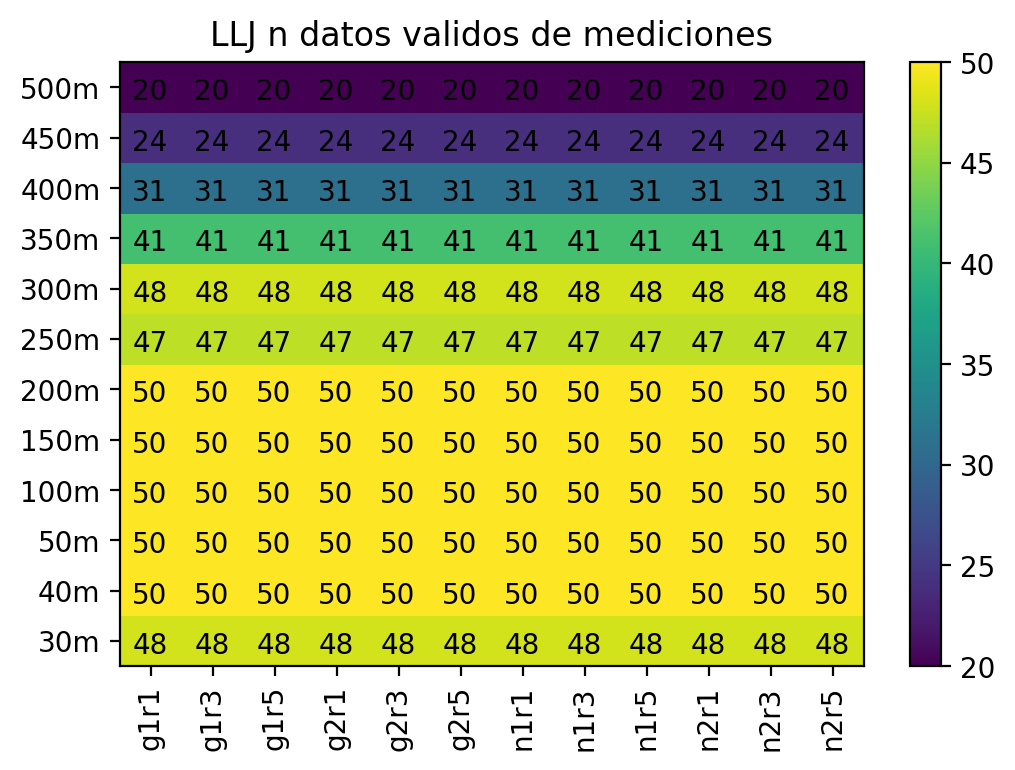

In [18]:
plt.rcParams['figure.dpi'] = 200
obsexpnames = ['OBS', 'g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5','n1r1', 'n1r3', 'n1r5', 'n2r1', 'n2r3', 'n2r5']
cmap = plt.get_cmap('viridis')
cb = plt.pcolormesh(valts, cmap=cmap)

for x in range(12):
     for y in range(12):
            plt.annotate('{0:.0f}'.format(valts[y,x]), (x+0.2, y+0.25))
plt.title('LLJ n datos validos de mediciones');
plt.colorbar(cb);
plt.xticks(0.5+np.arange(12), expnames, rotation=90 );
plt.yticks(0.5+np.arange(12), levlabel, rotation=0 );

In [19]:
media

array([[3.04, 1.52, 1.77, 1.42, 1.50, 1.89, 1.63, 1.35, 1.73, 1.27, 1.52,
        1.86, 1.40],
       [2.52, 1.54, 1.84, 1.44, 1.54, 1.94, 1.65, 1.36, 1.76, 1.27, 1.53,
        1.92, 1.46],
       [2.95, 1.51, 1.87, 1.42, 1.55, 1.96, 1.64, 1.33, 1.75, 1.26, 1.52,
        1.97, 1.48],
       [3.86, 1.39, 2.01, 1.34, 1.56, 2.06, 1.60, 1.24, 1.74, 1.24, 1.52,
        2.16, 1.59],
       [4.50, 1.30, 2.12, 1.29, 1.55, 2.25, 1.55, 1.22, 1.77, 1.27, 1.59,
        2.25, 1.64],
       [4.88, 1.27, 2.25, 1.28, 1.52, 2.60, 1.54, 1.25, 1.78, 1.33, 1.68,
        2.32, 1.71],
       [5.39, 1.29, 2.43, 1.30, 1.53, 3.11, 1.58, 1.36, 1.79, 1.40, 1.84,
        2.43, 1.84],
       [5.41, 1.38, 2.50, 1.35, 1.54, 3.37, 1.62, 1.50, 1.83, 1.38, 1.96,
        2.46, 1.87],
       [6.46, 1.47, 2.65, 1.32, 1.70, 3.77, 1.77, 1.56, 1.89, 1.30, 2.06,
        2.49, 1.87],
       [6.93, 1.53, 2.59, 1.26, 1.75, 3.81, 1.74, 1.56, 1.87, 1.19, 2.03,
        2.33, 1.70],
       [7.36, 1.99, 2.78, 1.60, 1.97, 3.73, 2.04, 

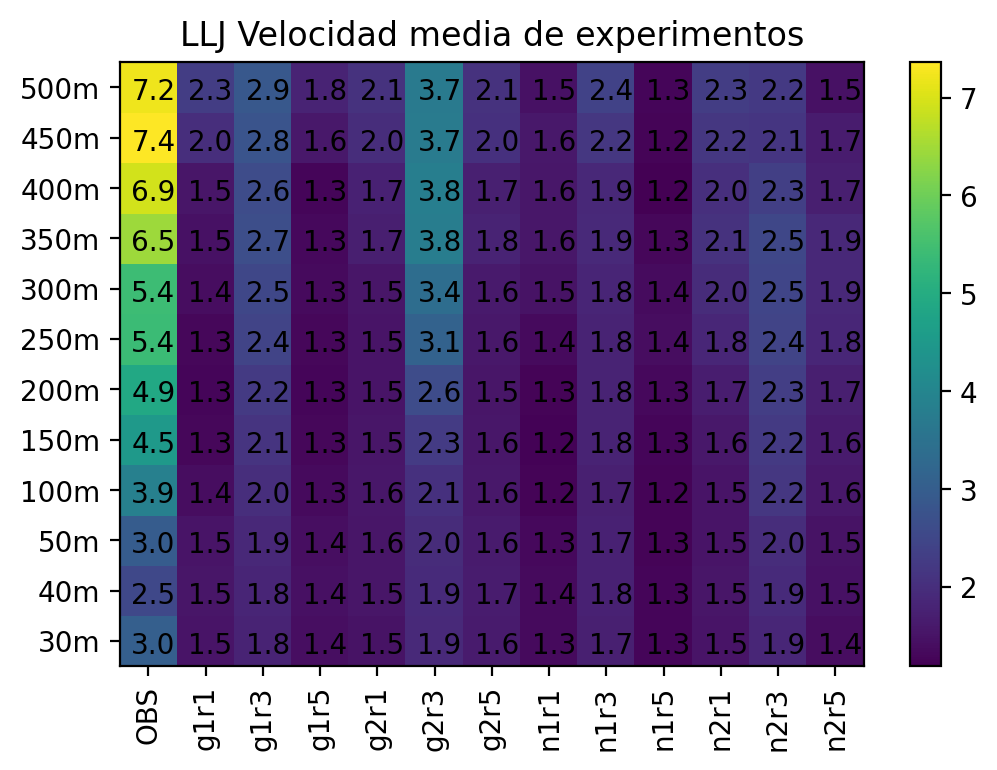

In [20]:
plt.rcParams['figure.dpi'] = 200
obsexpnames = ['OBS', 'g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5','n1r1', 'n1r3', 'n1r5', 'n2r1', 'n2r3', 'n2r5']
cmap = plt.get_cmap('viridis')
cb = plt.pcolormesh(media, cmap=cmap)

for x in range(13):
     for y in range(12):
            plt.annotate('{0:.1f}'.format(media[y,x]), (x+0.2, y+0.25))
plt.title('LLJ Velocidad media de experimentos');
plt.colorbar(cb);
plt.xticks(0.5+np.arange(13), obsexpnames, rotation=90 );
plt.yticks(0.5+np.arange(12), levlabel, rotation=0 );

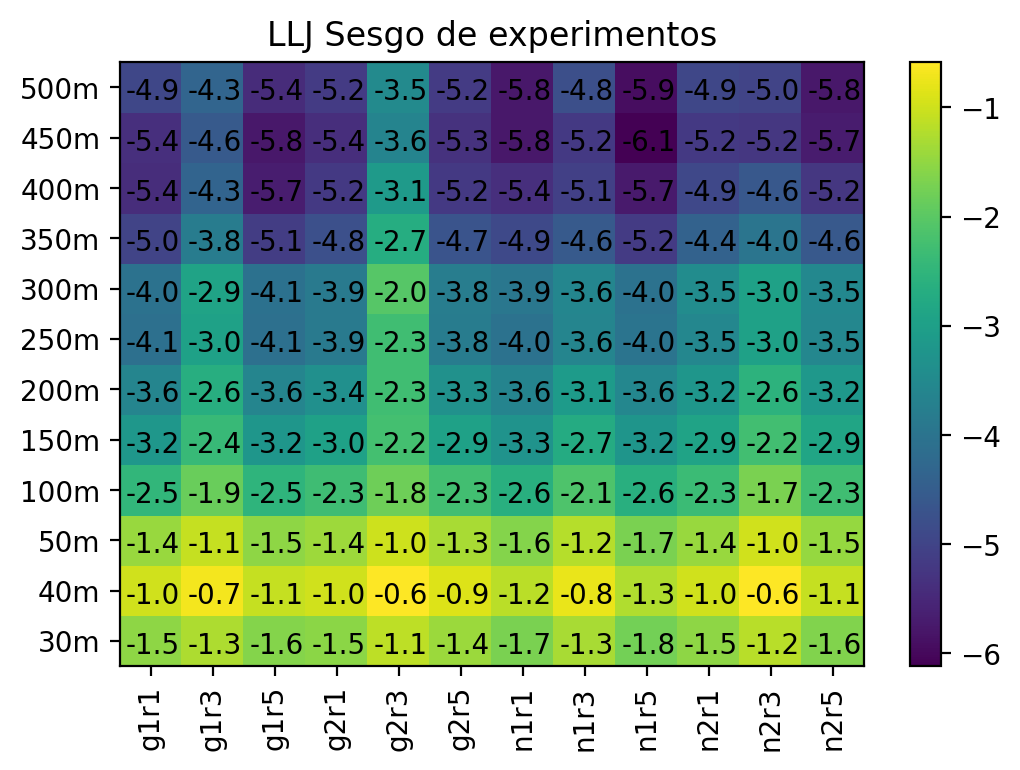

In [21]:
plt.rcParams['figure.dpi'] = 200
obsexpnames = ['OBS', 'g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5','n1r1', 'n1r3', 'n1r5', 'n2r1', 'n2r3', 'n2r5']
cmap = plt.get_cmap('viridis')
cb = plt.pcolormesh(biass, cmap=cmap)

for x in range(12):
     for y in range(12):
            plt.annotate('{0:.1f}'.format(biass[y,x]), (x+0.1, y+0.25))
plt.title('LLJ Sesgo de experimentos');
plt.colorbar(cb);
plt.xticks(0.5+np.arange(12), expnames, rotation=90 );
plt.yticks(0.5+np.arange(12), levlabel, rotation=0 );

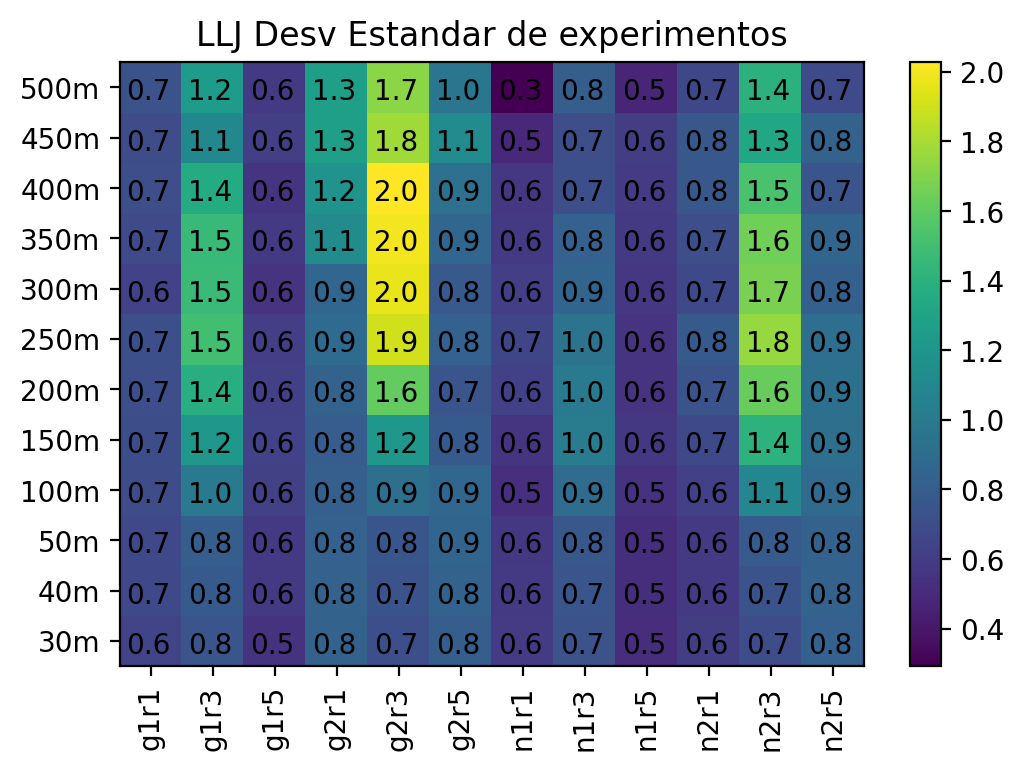

In [22]:
plt.rcParams['figure.dpi'] = 200
obsexpnames = ['OBS', 'g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5','n1r1', 'n1r3', 'n1r5', 'n2r1', 'n2r3', 'n2r5']
cmap = plt.get_cmap('viridis')
cb = plt.pcolormesh(sdevs, cmap=cmap)

for x in range(12):
     for y in range(12):
            plt.annotate('{0:.1f}'.format(sdevs[y,x]), (x+0.1, y+0.25))
plt.title('LLJ Desv Estandar de experimentos');
plt.colorbar(cb);
plt.xticks(0.5+np.arange(12), expnames, rotation=90 );
plt.yticks(0.5+np.arange(12), levlabel, rotation=0 );

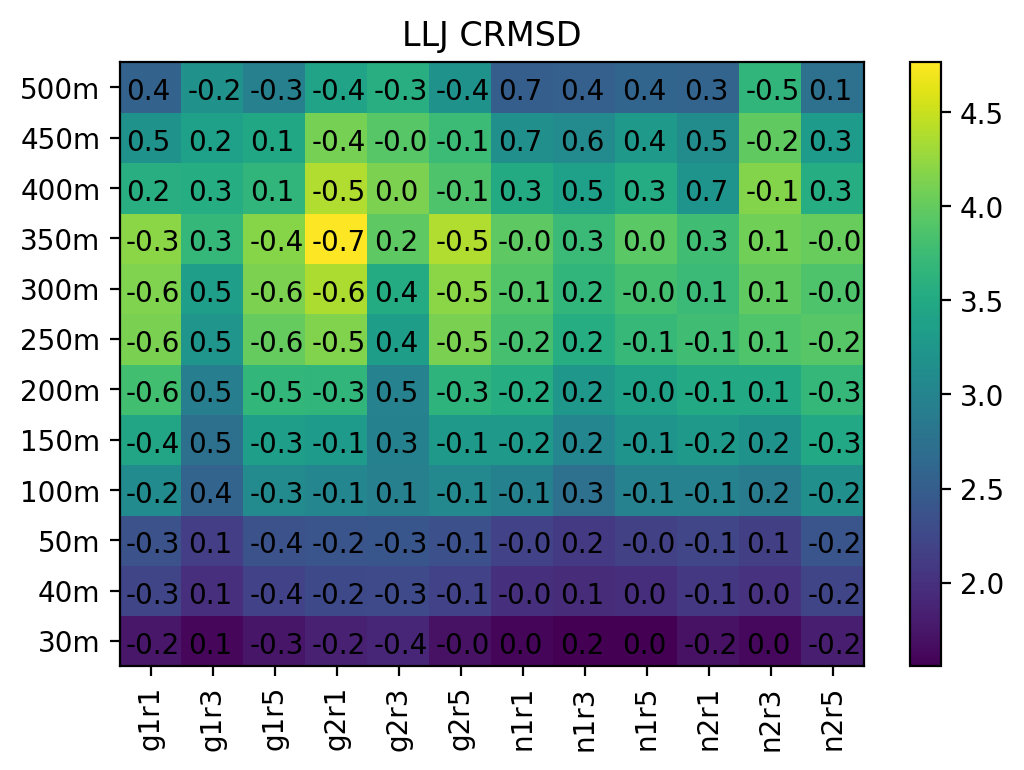

In [23]:
plt.rcParams['figure.dpi'] = 200
obsexpnames = ['OBS', 'g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5','n1r1', 'n1r3', 'n1r5', 'n2r1', 'n2r3', 'n2r5']
cmap = plt.get_cmap('viridis')
cb = plt.pcolormesh(ncl_crmsd, cmap=cmap)

for x in range(12):
     for y in range(12):
            plt.annotate('{0:.1f}'.format(corrs[y,x]), (x+0.1, y+0.25))
plt.title('LLJ CRMSD');
plt.colorbar(cb);
plt.xticks(0.5+np.arange(12), expnames, rotation=90 );
plt.yticks(0.5+np.arange(12), levlabel, rotation=0 );

In [24]:
exns[[0,2,3,4,5],:]

array([[b'g1r1 30m', b'g1r3 30m', b'g1r5 30m', b'g2r1 30m', b'g2r3 30m',
        b'g2r5 30m', b'n1r1 30m', b'n1r3 30m', b'n1r5 30m', b'n2r1 30m',
        b'n2r3 30m', b'n2r5 30m'],
       [b'g1r1 50m', b'g1r3 50m', b'g1r5 50m', b'g2r1 50m', b'g2r3 50m',
        b'g2r5 50m', b'n1r1 50m', b'n1r3 50m', b'n1r5 50m', b'n2r1 50m',
        b'n2r3 50m', b'n2r5 50m'],
       [b'g1r1 100m', b'g1r3 100m', b'g1r5 100m', b'g2r1 100m',
        b'g2r3 100m', b'g2r5 100m', b'n1r1 100m', b'n1r3 100m',
        b'n1r5 100m', b'n2r1 100m', b'n2r3 100m', b'n2r5 100m'],
       [b'g1r1 150m', b'g1r3 150m', b'g1r5 150m', b'g2r1 150m',
        b'g2r3 150m', b'g2r5 150m', b'n1r1 150m', b'n1r3 150m',
        b'n1r5 150m', b'n2r1 150m', b'n2r3 150m', b'n2r5 150m'],
       [b'g1r1 200m', b'g1r3 200m', b'g1r5 200m', b'g2r1 200m',
        b'g2r3 200m', b'g2r5 200m', b'n1r1 200m', b'n1r3 200m',
        b'n1r5 200m', b'n2r1 200m', b'n2r3 200m', b'n2r5 200m']],
      dtype='|S9')

In [25]:
ncl_ratio[[0,2,3,4,5],:]
        #Revisar el calculo de ratio


array([[0.43, 0.50, 0.36, 0.56, 0.47, 0.54, 0.40, 0.49, 0.34, 0.40, 0.46,
        0.55],
       [0.32, 0.38, 0.28, 0.40, 0.36, 0.41, 0.27, 0.37, 0.25, 0.28, 0.38,
        0.40],
       [0.24, 0.35, 0.22, 0.29, 0.32, 0.30, 0.18, 0.32, 0.19, 0.22, 0.38,
        0.31],
       [0.22, 0.39, 0.21, 0.26, 0.39, 0.25, 0.18, 0.32, 0.18, 0.22, 0.45,
        0.30],
       [0.21, 0.41, 0.19, 0.25, 0.48, 0.22, 0.19, 0.30, 0.17, 0.22, 0.49,
        0.28]])

In [26]:
ncl_crmsd[[0,2,3,4,5],:]

array([[1.75, 1.62, 1.73, 1.85, 1.91, 1.70, 1.60, 1.56, 1.56, 1.70, 1.63,
        1.82],
       [2.37, 2.14, 2.37, 2.39, 2.41, 2.34, 2.19, 2.11, 2.17, 2.23, 2.15,
        2.39],
       [3.10, 2.58, 3.08, 3.02, 2.94, 3.06, 2.96, 2.74, 2.96, 2.98, 2.89,
        3.16],
       [3.44, 2.74, 3.35, 3.31, 2.96, 3.29, 3.29, 3.03, 3.22, 3.29, 3.19,
        3.48],
       [3.79, 2.92, 3.67, 3.66, 2.97, 3.63, 3.54, 3.25, 3.41, 3.50, 3.50,
        3.70]])

In [27]:
ncl_ratio[[5,6,7,8,9],:]
        #Revisar el calculo de ratio
# 

array([[0.21, 0.41, 0.19, 0.25, 0.48, 0.22, 0.19, 0.30, 0.17, 0.22, 0.49,
        0.28],
       [0.20, 0.41, 0.17, 0.25, 0.52, 0.23, 0.18, 0.26, 0.15, 0.22, 0.48,
        0.25],
       [0.17, 0.39, 0.15, 0.23, 0.52, 0.21, 0.16, 0.23, 0.15, 0.18, 0.45,
        0.22],
       [0.17, 0.37, 0.15, 0.29, 0.51, 0.22, 0.15, 0.21, 0.15, 0.18, 0.42,
        0.22],
       [0.19, 0.37, 0.15, 0.32, 0.55, 0.25, 0.16, 0.19, 0.16, 0.21, 0.42,
        0.20]])

In [28]:
ncl_crmsd[[5,6,7,8,9],:]

array([[3.79, 2.92, 3.67, 3.66, 2.97, 3.63, 3.54, 3.25, 3.41, 3.50, 3.50,
        3.70],
       [4.12, 3.23, 4.01, 4.15, 3.33, 4.12, 3.82, 3.55, 3.71, 3.78, 3.88,
        3.92],
       [4.14, 3.34, 4.13, 4.37, 3.52, 4.21, 3.90, 3.66, 3.81, 3.73, 3.99,
        3.87],
       [4.21, 3.70, 4.18, 4.76, 3.96, 4.39, 3.97, 3.73, 3.95, 3.78, 4.07,
        4.02],
       [3.57, 3.54, 3.66, 4.39, 4.13, 3.87, 3.51, 3.37, 3.53, 3.21, 4.16,
        3.54]])

In [29]:

print('CA_ratio   = (/', *ncl_ratio[0], '/)', sep = ", ")

CA_ratio   = (/, 0.4259494999865887, 0.5006315167972524, 0.3638107944991273, 0.5592877189357909, 0.4734880688030003, 0.5350670851106205, 0.39756208908281643, 0.4868378817675205, 0.3406179906429025, 0.4007867913511548, 0.46171012043611964, 0.5520849267941742, /)


In [30]:
print(*ncl_ratio[0], sep = ", ")

0.4259494999865887, 0.5006315167972524, 0.3638107944991273, 0.5592877189357909, 0.4734880688030003, 0.5350670851106205, 0.39756208908281643, 0.4868378817675205, 0.3406179906429025, 0.4007867913511548, 0.46171012043611964, 0.5520849267941742
